In [4]:
import librosa
audio_file_path='blues/blues.00029.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [5]:
print(librosa_audio_data)

[-0.01669312 -0.02764893 -0.02191162 ...  0.12365723  0.13430786
  0.1262207 ]


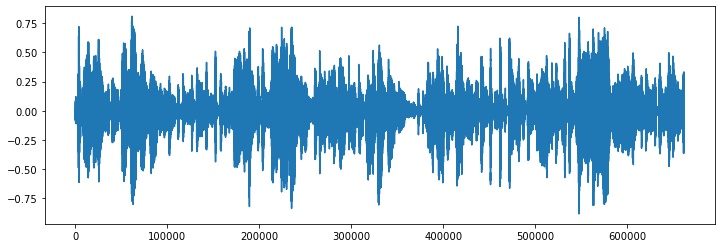

In [6]:
    ### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

# Here Librosa converts the signal to mono, meaning the channel will always be 1

In [9]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 


In [10]:
wave_audio

array([-547, -906, -718, ..., 4052, 4401, 4136], dtype=int16)

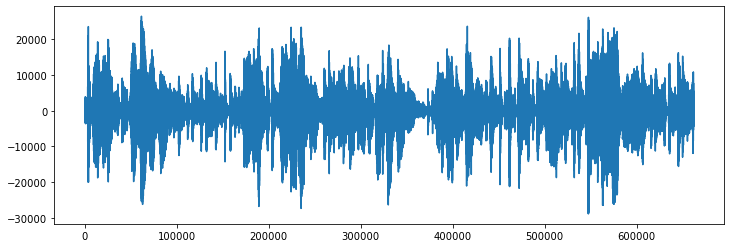

In [11]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [12]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 1293)


In [13]:
mfccs

array([[-267.181     , -255.09286   , -263.80154   , ..., -222.76826   ,
        -210.71355   , -198.28906   ],
       [ 128.52802   ,  109.82316   ,   96.012314  , ...,   99.75595   ,
         114.9534    ,  123.96608   ],
       [  -0.5488878 ,   -7.793934  ,  -14.351104  , ...,   12.419016  ,
          14.653486  ,   22.50527   ],
       ...,
       [   4.5835166 ,    4.4377165 ,    1.7375661 , ...,    1.2212839 ,
          12.529355  ,   17.798271  ],
       [  -2.0450118 ,   -3.6961184 ,   -2.744227  , ...,   13.090096  ,
          14.904619  ,   15.477525  ],
       [  -4.4501505 ,   -3.5721316 ,    1.6445508 , ...,   -0.60600233,
           0.73274875,    8.862683  ]], dtype=float32)

In [14]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='Data/audio/'
metadata=pd.read_csv('Data/metadata/features_30_sec.csv')
metadata.head()

,slice_filename,length,fold,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,1,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.0645,2002.449060,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,1,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.0736,2039.036516,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,1,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.6434,1747.702312,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,1,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.9424,1596.412872,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,1,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.9393,1748.172116,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [15]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [16]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_filename"]))
    final_class_labels=row["label"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

999it [03:08,  5.30it/s]


In [17]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
1,"[-207.52383, 123.98514, 8.947019, 35.86715, 2....",blues
2,"[-90.757164, 140.44087, -29.084547, 31.686691,...",blues
3,"[-199.57513, 150.0861, 5.663404, 26.855282, 1....",blues
4,"[-160.35417, 126.20948, -35.581394, 22.139256,...",blues


In [18]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [19]:
X.shape

(999, 40)

In [21]:
y

array(['blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blu

In [22]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [17]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [23]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
X_train

array([[ 2.6653410e+01,  7.9789711e+01, -5.2055866e+01, ...,
        -1.4430333e+00, -1.2734197e+00, -5.9081392e+00],
       [-1.4495711e+02,  1.1846496e+02,  2.0525068e+01, ...,
         1.8998559e+00, -1.8821739e+00, -1.8517891e+00],
       [-6.6108925e+01,  9.7883812e+01, -1.8831675e+01, ...,
        -1.2424636e+00, -6.3691193e-01, -1.3383397e+00],
       ...,
       [-7.7426697e+01,  1.3087869e+02, -2.3275221e+01, ...,
        -4.2062173e+00, -3.5183537e+00,  2.6050329e+00],
       [-1.9040649e+02,  1.2951292e+02, -7.8296251e+00, ...,
        -2.2419317e+00, -3.9879441e+00, -1.9877437e+00],
       [-4.6609550e+01,  8.6802017e+01, -3.4776672e+01, ...,
         1.4676020e-01,  9.2151529e-01, -8.7239444e-01]], dtype=float32)

In [25]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [26]:
X_train.shape

(799, 40)

In [27]:
X_test.shape

(200, 40)

In [28]:
y_train.shape

(799, 10)

In [29]:
y_test.shape

(200, 10)

# Model Creation

In [30]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [32]:
### No of classes
num_labels=y.shape[1]

In [33]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [34]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [35]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
24/25 [===========================>..] - ETA: 0s - loss: 23.6311 - accuracy: 0.1133
Epoch 1: val_loss improved from inf to 3.51171, saving model to saved_models\audio_classification.hdf5
25/25 [==============================] - 3s 39ms/step - loss: 23.3296 - accuracy: 0.1101 - val_loss: 3.5117 - val_accuracy: 0.1400
Epoch 2/100
20/25 [=======================>......] - ETA: 0s - loss: 10.5366 - accuracy: 0.1469
Epoch 2: val_loss improved from 3.51171 to 2.18462, saving model to saved_models\audio_classification.hdf5
25/25 [==============================] - 0s 19ms/step - loss: 10.1562 - accuracy: 0.1552 - val_loss: 2.1846 - val_accuracy: 0.1900
Epoch 3/100
25/25 [==============================] - ETA: 0s - loss: 6.1792 - accuracy: 0.1602
Epoch 3: val_loss did not improve from 2.18462
25/25 [==============================] - 0s 13ms/step - loss: 6.1792 - accuracy: 0.1602 - val_loss: 2.2258 - val_accuracy: 0.2000
Epoch 4/100
24/25 [===========================>..] - ETA: 0s - l

19/25 [=====================>........] - ETA: 0s - loss: 2.0887 - accuracy: 0.1974
Epoch 29: val_loss improved from 2.09812 to 2.09230, saving model to saved_models\audio_classification.hdf5
25/25 [==============================] - 0s 11ms/step - loss: 2.1127 - accuracy: 0.1940 - val_loss: 2.0923 - val_accuracy: 0.1850
Epoch 30/100
19/25 [=====================>........] - ETA: 0s - loss: 2.1582 - accuracy: 0.2089
Epoch 30: val_loss improved from 2.09230 to 2.05210, saving model to saved_models\audio_classification.hdf5
25/25 [==============================] - 0s 11ms/step - loss: 2.1489 - accuracy: 0.2053 - val_loss: 2.0521 - val_accuracy: 0.2050
Epoch 31/100
19/25 [=====================>........] - ETA: 0s - loss: 2.0695 - accuracy: 0.2648
Epoch 31: val_loss improved from 2.05210 to 2.02126, saving model to saved_models\audio_classification.hdf5
25/25 [==============================] - 0s 12ms/step - loss: 2.0800 - accuracy: 0.2528 - val_loss: 2.0213 - val_accuracy: 0.2700
Epoch 32/10

Epoch 55/100
19/25 [=====================>........] - ETA: 0s - loss: 1.7538 - accuracy: 0.3553
Epoch 55: val_loss improved from 1.73732 to 1.73546, saving model to saved_models\audio_classification.hdf5
25/25 [==============================] - 0s 11ms/step - loss: 1.7662 - accuracy: 0.3454 - val_loss: 1.7355 - val_accuracy: 0.4050
Epoch 56/100
21/25 [========================>.....] - ETA: 0s - loss: 1.7383 - accuracy: 0.3705
Epoch 56: val_loss improved from 1.73546 to 1.70958, saving model to saved_models\audio_classification.hdf5
25/25 [==============================] - 0s 12ms/step - loss: 1.7690 - accuracy: 0.3542 - val_loss: 1.7096 - val_accuracy: 0.4150
Epoch 57/100
19/25 [=====================>........] - ETA: 0s - loss: 1.7614 - accuracy: 0.3536
Epoch 57: val_loss improved from 1.70958 to 1.70799, saving model to saved_models\audio_classification.hdf5
25/25 [==============================] - 0s 13ms/step - loss: 1.7891 - accuracy: 0.3542 - val_loss: 1.7080 - val_accuracy: 0.395

20/25 [=======================>......] - ETA: 0s - loss: 1.6049 - accuracy: 0.4187
Epoch 82: val_loss improved from 1.63181 to 1.62719, saving model to saved_models\audio_classification.hdf5
25/25 [==============================] - 0s 11ms/step - loss: 1.6115 - accuracy: 0.4180 - val_loss: 1.6272 - val_accuracy: 0.4450
Epoch 83/100
19/25 [=====================>........] - ETA: 0s - loss: 1.5310 - accuracy: 0.4638
Epoch 83: val_loss did not improve from 1.62719
25/25 [==============================] - 0s 9ms/step - loss: 1.5495 - accuracy: 0.4456 - val_loss: 1.6349 - val_accuracy: 0.4700
Epoch 84/100
20/25 [=======================>......] - ETA: 0s - loss: 1.5649 - accuracy: 0.4266
Epoch 84: val_loss improved from 1.62719 to 1.61095, saving model to saved_models\audio_classification.hdf5
25/25 [==============================] - 0s 11ms/step - loss: 1.5523 - accuracy: 0.4343 - val_loss: 1.6110 - val_accuracy: 0.4750
Epoch 85/100
19/25 [=====================>........] - ETA: 0s - loss: 1.

In [36]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.4950000047683716


In [37]:
X_test[1]

array([-28.989244  , 104.531006  , -30.983423  ,  38.162056  ,
        -8.009196  ,  30.894712  , -20.608162  ,  25.823612  ,
       -12.974684  ,  16.943222  , -12.272944  ,  10.787743  ,
       -10.56656   ,   6.8798337 , -10.299989  ,   6.9615793 ,
       -10.2633505 ,   0.7075954 ,  -6.008073  ,   1.353122  ,
        -3.8979306 ,   1.5598717 ,  -5.863832  ,  -1.4095501 ,
        -0.44856638,  -3.6950705 ,  -0.7109057 ,  -1.2966502 ,
        -4.2764664 ,  -2.3328962 ,  -2.737379  ,   0.95808023,
         0.43785253,  -2.4960024 ,  -1.9473956 ,  -4.005747  ,
        -2.3235273 ,  -3.921798  ,   1.2636641 ,  -1.1532403 ],
      dtype=float32)

In [38]:
model.predict(X_test)

7/7 [==============================] - 0s 3ms/step


array([[2.46787671e-13, 1.18044602e-11, 1.02070186e-09, ...,
        9.99861360e-01, 8.96249208e-09, 1.00887576e-09],
       [2.94403940e-01, 2.52694660e-03, 3.52800488e-02, ...,
        9.40045575e-04, 1.86656173e-02, 3.09822440e-01],
       [1.09633185e-01, 5.72253875e-02, 1.30197421e-01, ...,
        4.53512296e-02, 1.84401914e-01, 1.05279312e-01],
       ...,
       [8.95096585e-02, 3.14538367e-02, 7.50476494e-02, ...,
        6.83164075e-02, 1.73878416e-01, 1.02697916e-01],
       [1.78016931e-01, 1.04483112e-03, 2.13758834e-02, ...,
        8.40501569e-04, 1.89752784e-02, 2.28317097e-01],
       [9.95617807e-02, 4.28651646e-02, 1.28404796e-01, ...,
        5.60786165e-02, 1.78406954e-01, 1.18971832e-01]], dtype=float32)

### Testing Some Test Audio Data

Steps
- Preprocess the new audio data
- predict the classes


In [44]:
filename="Data/audio/fold6/jazz.00060.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=(model.predict(mfccs_scaled_features))
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-1.9040649e+02  1.2951292e+02 -7.8296251e+00  2.0722414e+01
  2.1996531e+00  7.7903323e+00  6.1863093e+00  1.3470622e+00
 -1.5960288e+00  2.0170779e+00 -1.9909496e+00  1.1614684e+00
 -1.3529066e+00  6.4120717e+00 -1.9784170e-01 -1.5667160e+00
  2.2386713e+00  2.0398612e+00  1.7610639e-01  1.1900406e+00
  6.5199876e+00  5.6083541e+00  1.4335420e+00 -2.1762080e+00
 -1.9926903e+00  3.5362154e-02 -1.8417446e-01 -5.0083923e+00
 -7.0454926e+00 -5.9068809e+00 -4.7025886e+00 -4.4469337e+00
 -4.4018288e+00 -5.6989398e+00 -2.0735302e+00  6.5656453e-02
 -2.6346833e-01 -2.2419317e+00 -3.9879441e+00 -1.9877437e+00]
[[-1.9040649e+02  1.2951292e+02 -7.8296251e+00  2.0722414e+01
   2.1996531e+00  7.7903323e+00  6.1863093e+00  1.3470622e+00
  -1.5960288e+00  2.0170779e+00 -1.9909496e+00  1.1614684e+00
  -1.3529066e+00  6.4120717e+00 -1.9784170e-01 -1.5667160e+00
   2.2386713e+00  2.0398612e+00  1.7610639e-01  1.1900406e+00
   6.5199876e+00  5.6083541e+00  1.4335420e+00 -2.1762080e+00
  -1.9926903e+00 